Run the winner model on 100x random images from paient

08-02-2025

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

In [5]:
import tensorflow as tf

print(tf.__version__)
tf.random.set_seed(42)
tf.config.set_visible_devices([], "GPU")

2.18.0


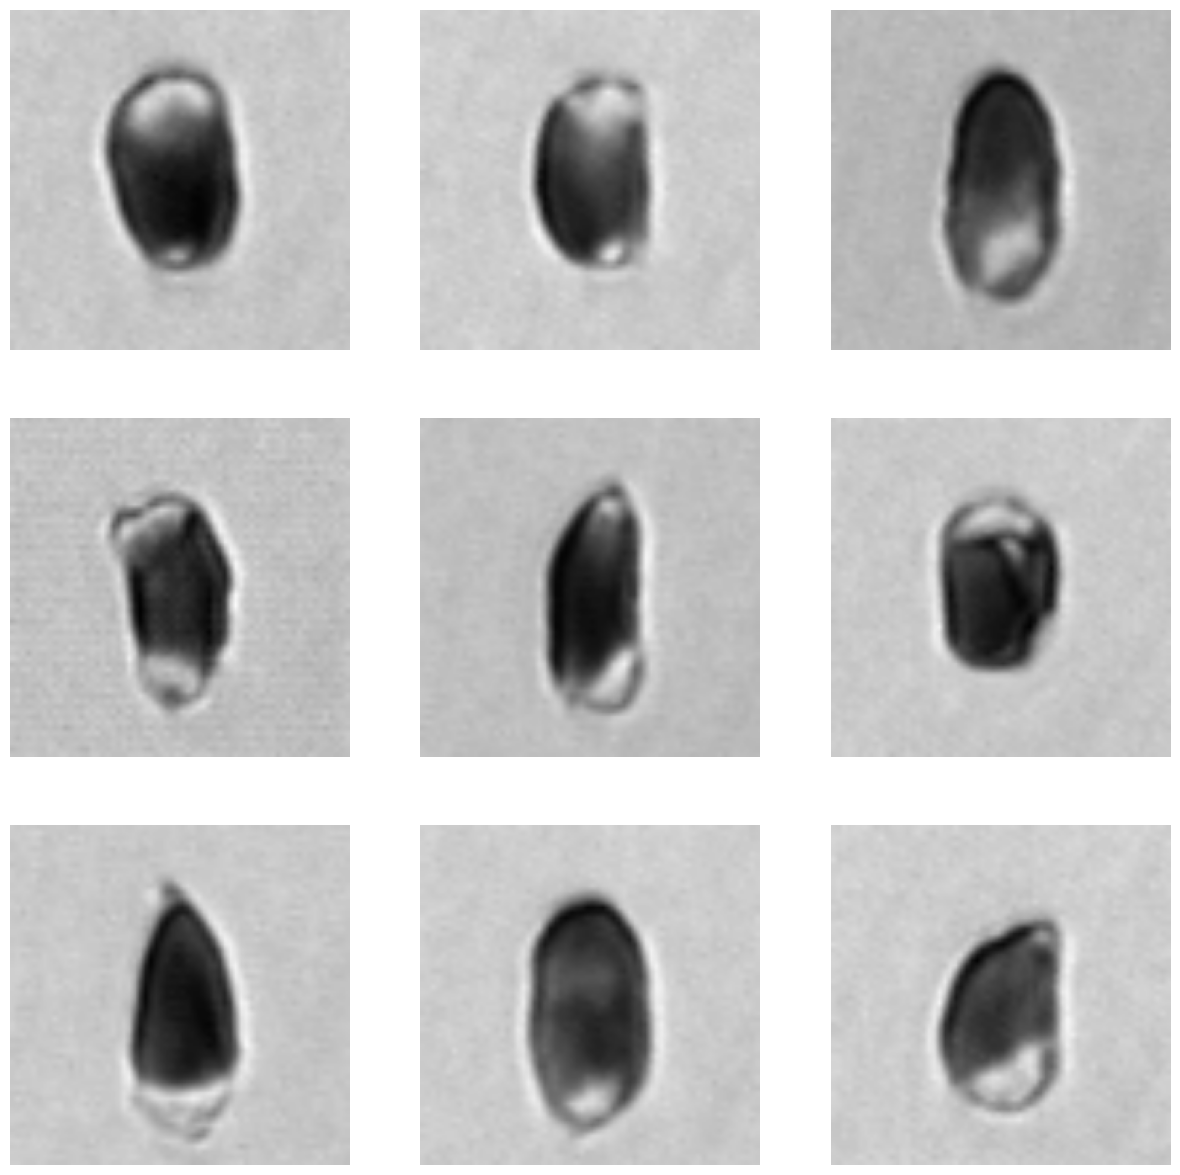

In [ ]:
# Define the path to the directory containing the images

image_dir = Path("/home/t.afanasyeva/my_storage/candy corn cells patient 24-Survive-19")


# Get a list of all .png files in the directory
image_files = list(image_dir.glob("*.png"))

# Select 100 random images
random_images = random.sample(image_files, 100)

# Load and resize images as float tensors
image_tensors = [
    tf.image.resize(
        image.img_to_array(image.load_img(img_path)).astype(np.float32), (224, 224)
    )
    for img_path in random_images
]

# Print the shape of the first image tensor to verify
print(image_tensors[0].shape)  # Take a random sample of 9 images
random_sample = random.sample(image_tensors, 9)

plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(random_sample[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()

In [ ]:
import random
from tensorflow.keras.preprocessing import image

# Define the path to the directory containing the images
# image_dir = Path(
#     "/home/t.afanasyeva/research_storage/Processing/Lab - Van Dam/datasets/srf_anaemias/CytPix/processed/24-Survive-018"
# )
image_dir = Path("/home/t.afanasyeva/my_storage/candy corn cells patient 24-Survive-19")


# Get a list of all .png files in the directory
image_files = list(image_dir.glob("*.png"))

# Select 100 random images
random_images = random.sample(image_files, 100)

# Load and resize images as float tensors
image_tensors = [
    tf.image.resize(
        image.img_to_array(image.load_img(img_path)).astype(np.float32), (224, 224)
    )
    for img_path in random_images
]

# Print the shape of the first image tensor to verify
print(image_tensors[0].shape)

(224, 224, 3)


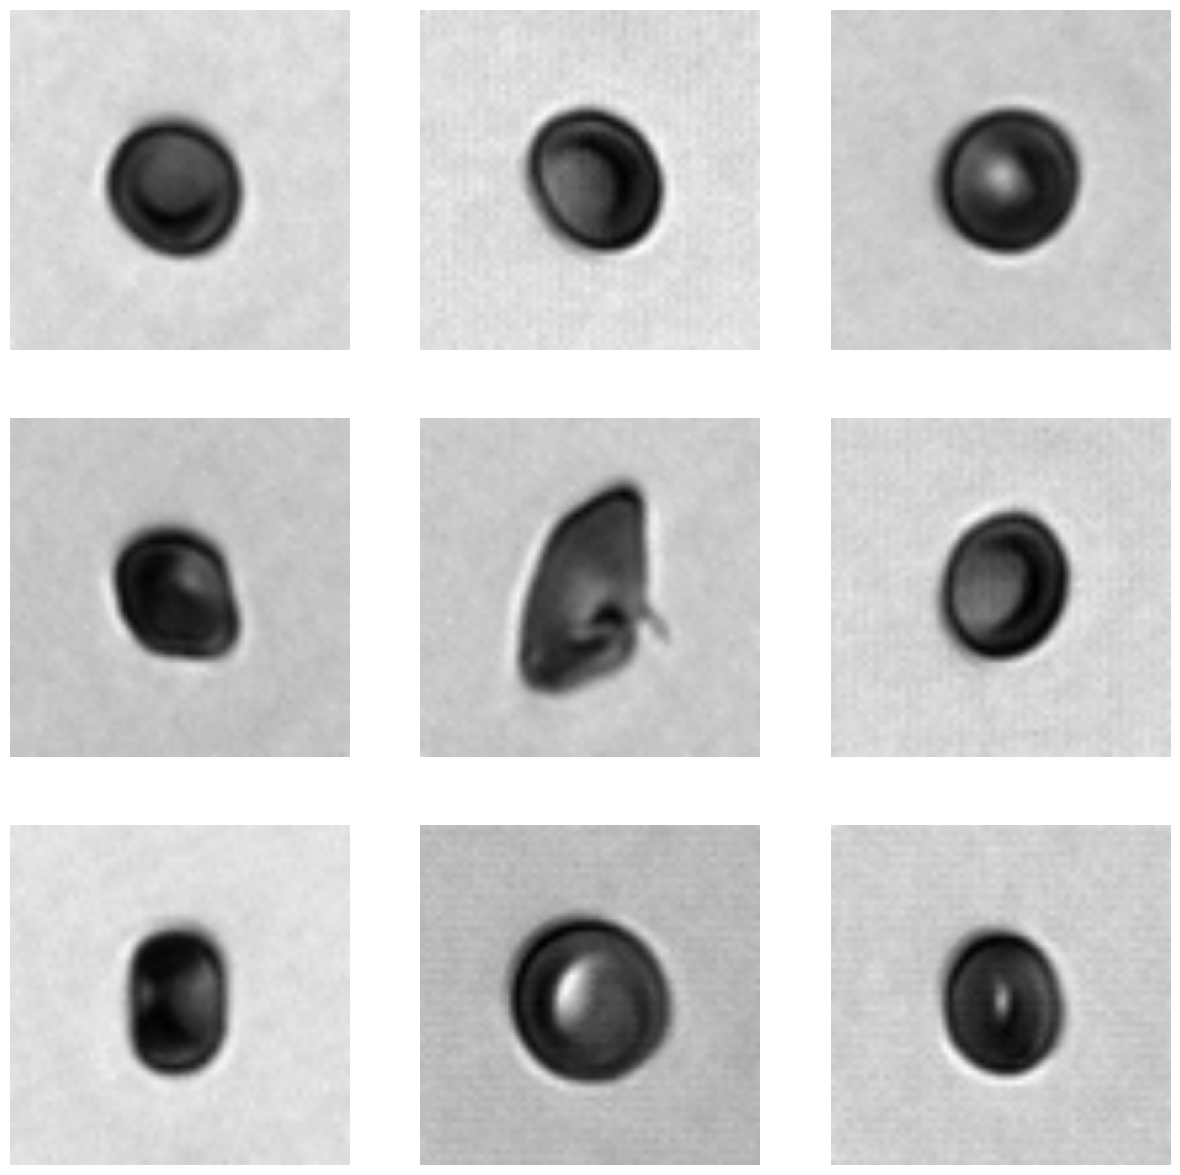

In [6]:
plt.figure(figsize=(15, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((image_tensors[i]).numpy().astype("uint8"))
    plt.axis("off")
plt.show()

Here needs to be adjusetd to the /home/t.afanasyeva/deep_learning_anaemias/output/250208_cytpix/250208_EfficientNetB0_v2.keras

In [ ]:
from tensorflow.keras.layers import (
    Dense,
)

model = tf.keras.models.load_model(
    "/home/t.afanasyeva/deep_learning_anaemias/output/250205_MobileNetV2.keras"
)
model.pop()
model.add(Dense(5, activation="softmax", name="dense_last"))

In [9]:
print(image_tensors[0].shape)

(224, 224, 3)


In [9]:
# Create a TensorFlow dataset from the image tensors
dataset = tf.data.Dataset.from_tensor_slices(image_tensors)

# Batch the dataset
batch_size = 32
batched_dataset = dataset.batch(batch_size).prefetch(1)

# Print the shape of the first batch to verify
for batch in batched_dataset.take(1):
    print(batch.shape)

(32, 224, 224, 3)


2025-02-08 18:09:29.657888: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
y_pred = model.predict(batched_dataset)

: 